# Comparisons of python and C++ implementations of the Kalman Filter class applied to the 1D trajectory problem

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [24]:
# Eventually, we want to set the parameters of the physical model and the Kalman filter from this file, then
# be able to run the Kalman filter using python, and the compiled C++ code, with exactly the same parameters 
# and measurements.

# For now, I will do things manually to see if the Kalman filter from python and c++ give the same results.


In [25]:
# import the Kalman filter class
from kalman_python import kf

In [26]:
# Load the cpp implementation data, since we need to use the same measurements to ensure consistency
cpp_data = pd.read_csv('../build/bin/kalman_output.csv')

cpp_data.head()

# this includes the following columns:
# time: list of times
# true: the true position of the object
# measurements: 'true' with randon noise added'
# predicted: the predicted position of the object from each step in the Kalman filter
# update: the updates position of the object from each step in the Kalman filter, (after taking the measurements into account)


,time,true,measurement,prediction,update
0,0.0,10.0000,5.87168,12.5000,11.7845
1,0.1,12.4510,11.09410,14.1214,13.7768
2,0.2,14.8038,20.17180,15.9868,16.4800
3,0.3,17.0586,18.38980,18.6299,18.6010
4,0.4,19.2152,23.81990,20.6508,21.0352


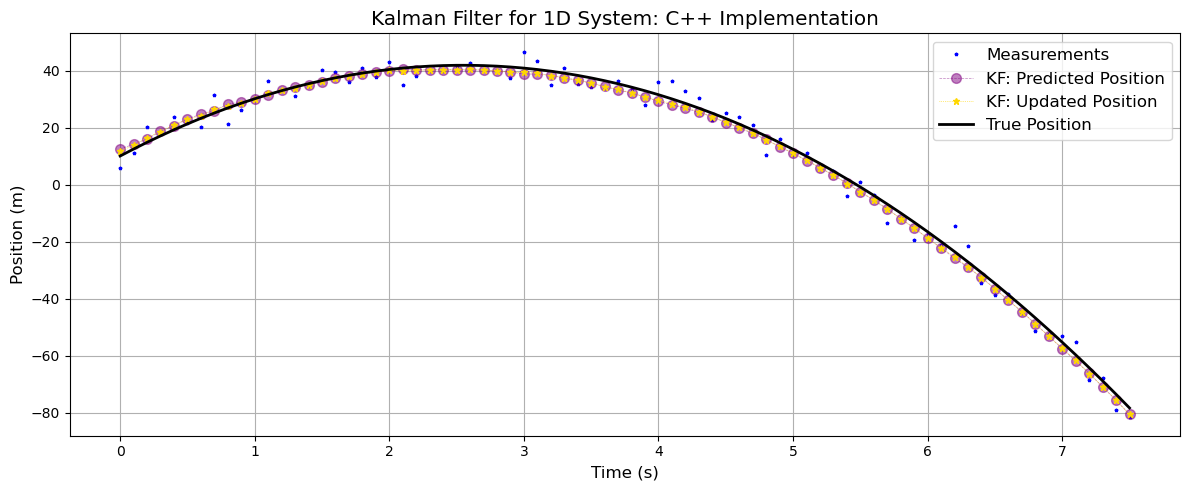

In [27]:
# plot the cpp filter results

# compare the true position, measurements, the predicted position and the updated position at each time step

# plot the results
fig = plt.figure(figsize=(12, 5))
fnt = 12 # font size
plt.plot(cpp_data['time'], cpp_data['measurement'], '*', markersize=2.5, label='Measurements', color='b', linewidth=0.5)
plt.plot(cpp_data['time'], cpp_data['prediction'],'o--', label='KF: Predicted Position',  color='purple', markersize=7, linewidth=0.5, alpha=0.5)
plt.plot(cpp_data['time'], cpp_data['update'], '*:', label='KF: Updated Position',  color='gold', markersize=5, linewidth=0.5, alpha=1)
plt.plot(cpp_data['time'], cpp_data['true'], label='True Position', color='black', linewidth=2)

plt.legend(loc='upper right', fontsize=fnt)
plt.title('Kalman Filter for 1D System: C++ Implementation', fontsize=fnt*1.2)
plt.xlabel('Time (s)', fontsize=fnt)
plt.ylabel('Position (m)', fontsize=fnt)
plt.tight_layout()
plt.grid()
plt.show()

# Python implementation

In [28]:
# load the physical and model parameters from the cpp output

# load the parameters from the csv file
df = pd.read_csv("../build/bin/kalman_params.csv")
params = dict(zip(df['name'], df['value']))

# set the parameters of the Kalman filter

#physical parameters
dt = params["dt"]
t_final = params["t_final"]
a = params["a"]
x0 = params["x0"]
v0 = params["v0"]
# filter parameters
var_x = params["var_x"]
var_v = params["var_v"]
cov_xv = params["cov_xv"]


In [29]:
# run the Kalman filter in python with the same parameters as in the cpp implementation
kalman = kf(dt, x0, v0, var_x, var_v, cov_xv, a) # create an instance of the kalman filter class

# measurements = [] # empty list to store measurements at each time step
py_predictions = [] # empty list to store predicted states at each time step  
py_updates = [] # empty list to store updated states at each time step

# loop through the position values of the trajectory (one at each time step)
for i, x in enumerate(cpp_data['true']):
    
    x_pred = kalman.predictions().item(0) # extract the predicted position from the state vector
    py_predictions.append(x_pred) # save the prediction

    # pick out measurement from the cpp data for this time step
    measurement = cpp_data['measurement'].iloc[i] # get the measurement from the cpp data
        
    # update the prediction with the measurement
    x_update = kalman.updates(measurement).item(0) # extract the updated position from the state vector
    py_updates.append(x_update) # save the update
    

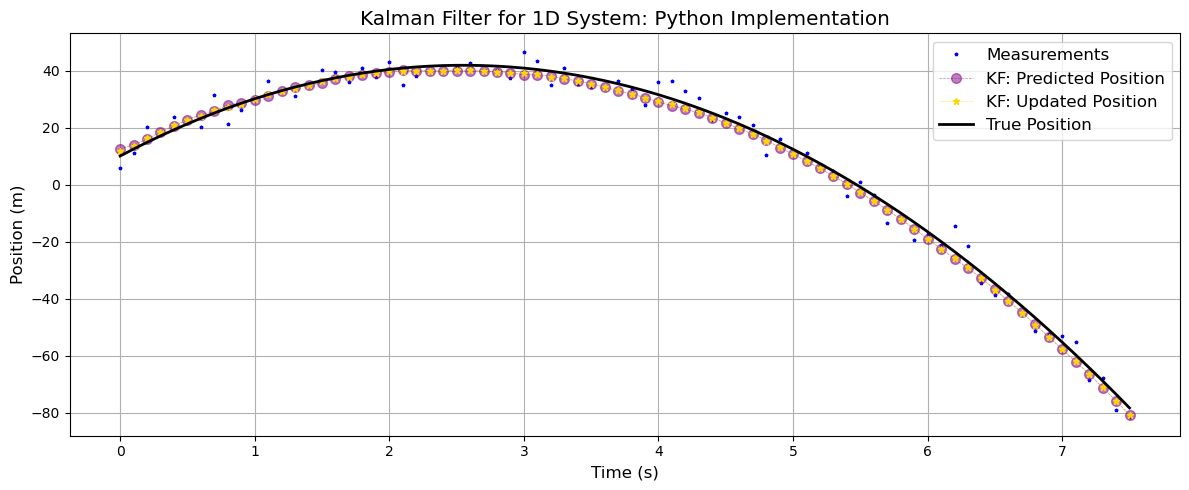

In [30]:
# plot the cpp filter results

# compare the true position, measurements, the predicted position and the updated position at each time step

# plot the results
fig = plt.figure(figsize=(12, 5))
fnt = 12 # font size
plt.plot(cpp_data['time'], cpp_data['measurement'], '*', markersize=2.5, label='Measurements', color='b', linewidth=0.5)
plt.plot(cpp_data['time'], py_predictions,'o--', label='KF: Predicted Position',  color='purple', markersize=7, linewidth=0.5, alpha=0.5)
plt.plot(cpp_data['time'], py_updates, '*:', label='KF: Updated Position',  color='gold', markersize=5, linewidth=0.5, alpha=1)
plt.plot(cpp_data['time'], cpp_data['true'], label='True Position', color='black', linewidth=2)

plt.legend(loc='upper right', fontsize=fnt)
plt.title('Kalman Filter for 1D System: Python Implementation', fontsize=fnt*1.2)
plt.xlabel('Time (s)', fontsize=fnt)
plt.ylabel('Position (m)', fontsize=fnt)
plt.tight_layout()
plt.grid()
plt.show()

# Compare python and cpp implementations

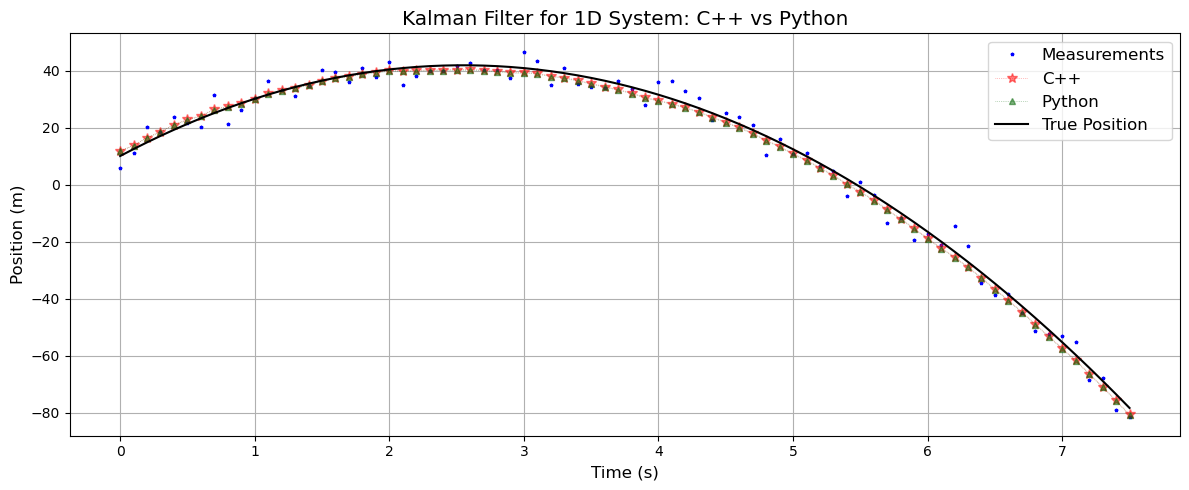

In [31]:
# compare the results of the C++ and Python implementations
# we are showing the final state out of the Filter, i.e. the updated state after the measurement

# plot the results
fig = plt.figure(figsize=(12, 5))
fnt=12

# measurements
plt.plot(cpp_data['time'], cpp_data['measurement'], '*', markersize=2.5, label='Measurements', color='b', linewidth=0.5)

# C++
plt.plot(cpp_data['time'], cpp_data['update'], '*:', label='C++',  color='r', markersize=7, linewidth=0.5, alpha=0.5)

# python
plt.plot(cpp_data['time'], py_updates, '^:', label='Python',  color='darkgreen', markersize=5, linewidth=0.5, alpha=0.5)

# true position
plt.plot(cpp_data['time'], cpp_data['true'], label='True Position', color='black', linewidth=1.5)

plt.legend(loc='upper right', fontsize=fnt)
plt.title('Kalman Filter for 1D System: C++ vs Python', fontsize=fnt*1.2)
plt.xlabel('Time (s)', fontsize=fnt)
plt.ylabel('Position (m)', fontsize=fnt)
plt.grid()
plt.tight_layout()
plt.show()


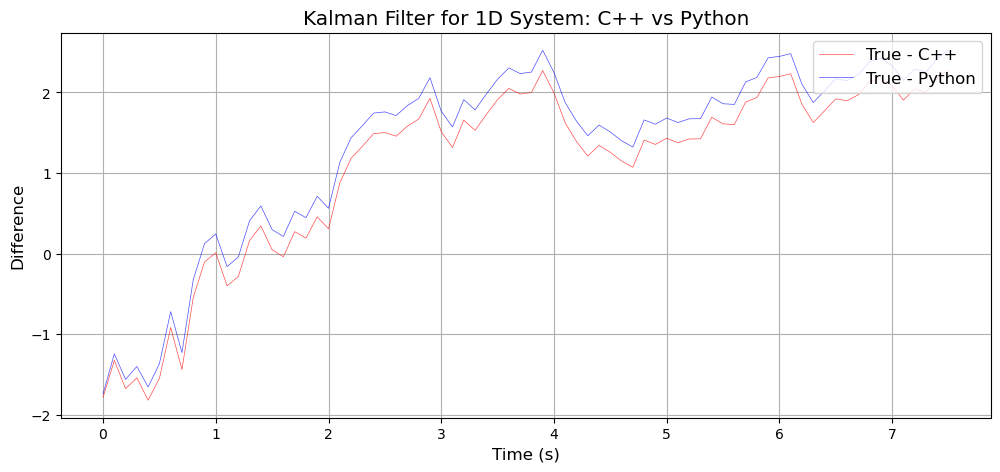

In [32]:
# plot the difference between the C++ and Python implementations with the true position

fig = plt.figure(figsize=(12, 5))
# C++
plt.plot(cpp_data['time'], (cpp_data['true']-cpp_data['update']), '-', label='True - C++',  color='r', markersize=7, linewidth=0.5, alpha=0.7)
# python
plt.plot(cpp_data['time'], (cpp_data['true']-py_updates), '-', label='True - Python',  color='b', markersize=7, linewidth=0.5, alpha=0.7)

plt.legend(loc='upper right', fontsize=fnt)
plt.title('Kalman Filter for 1D System: C++ vs Python', fontsize=fnt*1.2)
plt.xlabel('Time (s)', fontsize=fnt)
plt.ylabel('Difference', fontsize=fnt)
plt.grid()

